In [57]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/refs/heads/master/Bases%20de%20dados/dados_produtos.csv")

In [3]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [24]:
dic = {
    'product_name': 'Produto','rating':'Avaliação','rating_count': 'Quantidade de avaliações', 'purchased':'Comprou'
}

In [22]:
df.rename(columns = dic, inplace = True)

In [23]:
df.head()

,Produto,Avaliação,Quantidade de avaliações,Comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Produto                   100 non-null    object 
 1   Avaliação                 100 non-null    float64
 2   Quantidade de avaliações  100 non-null    int64  
 3   Comprou                   100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [35]:
df.describe

<bound method NDFrame.describe of       Produto  Avaliação  Quantidade de avaliações  Comprou
0   Televisão       3.04                        29        1
1     Celular       3.46                      3872        0
2   Cafeteira       3.25                      1187        0
3   Televisão       3.77                      4097        1
4   Videogame       5.00                      4738        1
..        ...        ...                       ...      ...
95       iPod       4.44                      1372        0
96    Celular       4.66                      1690        1
97  Televisão       4.33                      3364        1
98   Notebook       3.30                      1825        1
99       iPod       4.08                       533        0

[100 rows x 4 columns]>

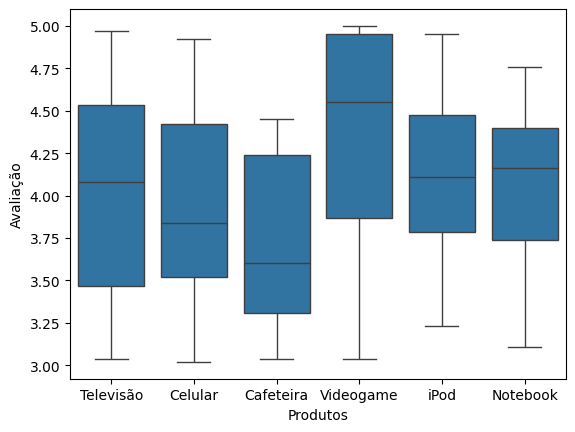

In [45]:
sns.boxplot(x='Produto', y='Avaliação', data=df)
plt.xlabel('Produtos')
plt.ylabel('Avaliação')
plt.show()

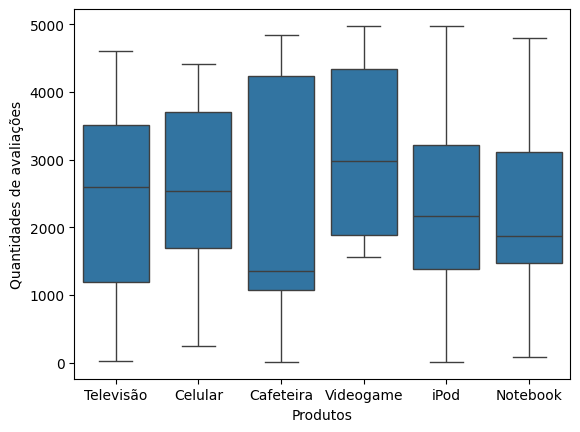

In [117]:
sns.boxplot(x='Produto', y='Quantidade de avaliações', data=df)
plt.xlabel('Produtos')
plt.ylabel('Quantidades de avaliações')
plt.show()

In [46]:
df = df.dropna()

In [60]:
algoritmo = DecisionTreeClassifier()

In [74]:
produtos = df['Produto'].unique()

In [110]:
sc = StandardScaler()

In [146]:
from scipy import stats

In [156]:
mediaqtd = df.groupby('Produto')['Quantidade de avaliações'].mean()
mediaav = df.groupby('Produto')['Avaliação'].mean()

modas = df.groupby('Produto')['Comprou'].apply(lambda x: x.mode().iloc[0])

modas

Produto
Cafeteira    0
Celular      1
Notebook     1
Televisão    1
Videogame    1
iPod         0
Name: Comprou, dtype: int64

In [162]:
for produto in produtos:
    X = mediaav.values
    Y = modas
    print()
    X_treino, X_teste, Y_treino,Y_teste = train_test_split(X.reshape(-1,1), Y.reshape(-1,1), test_size = 0.3, random_state = 42)
    X_treino = sc.fit_transform(X_treino)
    X_teste = sc.fit_transform(X_teste)
    algoritmo.fit(X_treino,Y_treino)
    df_produto = df[df['Produto'] == produto]
    plt.figure(figsize=(10,6))
    tree.plot_tree(algoritmo, 
        feature_names=['Avaliação', 'Quantidade de avaliações'], 
        class_names=['Não Comprou', 'Comprou'], 
        filled=True)
    plt.title(f'Árvore de Decisão - {produto}')
    plt.show()

AttributeError: 'Series' object has no attribute 'reshape'